# Árbol de decisíon para especies de flores

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
mainpath = "C:/Users/dguai/Documents/Courses/Machine Learning Data Science en Python/Practicas/Repositorios/Datasets"
data = pd.read_csv(mainpath + "/" + "Iris/iris.csv")

In [37]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

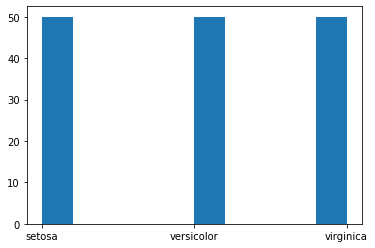

In [39]:
plt.hist(data.Species)

In [40]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [41]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [42]:
data["is_train"] = np.random.uniform(0,1, len(data))<=0.70

In [43]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [46]:
preds = tree.predict(test[predictors])

In [47]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,11,0,0
versicolor,0,14,1
virginica,0,1,12


## Visualización del árbol de decisión

In [48]:
from sklearn.tree import export_graphviz

In [49]:
with open("C:/Users/dguai/Documents/Courses/Machine Learning Data Science en Python/Practicas/Repositorios/Datasets/Iris/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [51]:
import os
from graphviz import Source

In [53]:
file = open("C:/Users/dguai/Documents/Courses/Machine Learning Data Science en Python/Practicas/Repositorios/Datasets/Iris/iris_dtree.dot", "r")
text = file.read()
text
Source(text)

## Cross validación para la poda

In [55]:
X = data[predictors]
Y = data[target]

In [56]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [58]:
from sklearn.model_selection import KFold

In [78]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
cv.split(X, Y)

<generator object _BaseKFold.split at 0x102A4300>

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [81]:
score = np.mean(scores)
score

0.9333333333333333

In [84]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    cv.split(X, Y)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)

Score para i =  1  es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i =  2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


In [85]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

## Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,Y)

RandomForestClassifier(n_jobs=2, oob_score=True)

In [88]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [89]:
forest.oob_score_

0.9533333333333334